In [1]:
pip install pmdarima

                                              0.0/569.7 kB ? eta -:--:--
                                              10.2/569.7 kB ? eta -:--:--
     -                                     30.7/569.7 kB 435.7 kB/s eta 0:00:02
     --                                    41.0/569.7 kB 393.8 kB/s eta 0:00:02
     -----                                 81.9/569.7 kB 459.5 kB/s eta 0:00:02
     -----                                 92.2/569.7 kB 438.1 kB/s eta 0:00:02
     -------                              112.6/569.7 kB 467.6 kB/s eta 0:00:01
     ---------                            143.4/569.7 kB 448.2 kB/s eta 0:00:01
     ----------                           174.1/569.7 kB 476.3 kB/s eta 0:00:01
     ------------                         204.8/569.7 kB 497.6 kB/s eta 0:00:01
     --------------                       225.3/569.7 kB 509.6 kB/s eta 0:00:01
     ---------------                      245.8/569.7 kB 502.2 kB/s eta 0:00:01
     ----------------                     266.2/569.7

In [121]:
import pandas as pd
import numpy as np

In [122]:
#read data
df = pd.read_csv("D:\\Intern\\SLT Digital Labs\\New folder\\vibration_log.csv", sep=';')
df.head()

,"id;""device_id"";""sensor_value"";""timestamp"""
0,"2042;""Device0002a"";""0.94"";""2023-07-11 07:38:20"""
1,"2043;""Device0002a"";""0.94"";""2023-07-11 07:38:21"""
2,"2044;""Device0002a"";""0.9"";""2023-07-11 07:38:22"""
3,"2045;""Device0002a"";""0.9"";""2023-07-11 07:38:23"""
4,"2046;""Device0002a"";""0.9"";""2023-07-11 07:38:25"""


In [123]:
df[['id', 'device_id', 'sensor_value', 'timestamp']] = df['id;"device_id";"sensor_value";"timestamp"'].str.split(';', expand=True)
df.head()

,"id;""device_id"";""sensor_value"";""timestamp""",id,device_id,sensor_value,timestamp
0,"2042;""Device0002a"";""0.94"";""2023-07-11 07:38:20""",2042,"""Device0002a""","""0.94""","""2023-07-11 07:38:20"""
1,"2043;""Device0002a"";""0.94"";""2023-07-11 07:38:21""",2043,"""Device0002a""","""0.94""","""2023-07-11 07:38:21"""
2,"2044;""Device0002a"";""0.9"";""2023-07-11 07:38:22""",2044,"""Device0002a""","""0.9""","""2023-07-11 07:38:22"""
3,"2045;""Device0002a"";""0.9"";""2023-07-11 07:38:23""",2045,"""Device0002a""","""0.9""","""2023-07-11 07:38:23"""
4,"2046;""Device0002a"";""0.9"";""2023-07-11 07:38:25""",2046,"""Device0002a""","""0.9""","""2023-07-11 07:38:25"""


In [124]:
df.drop('id;"device_id";"sensor_value";"timestamp"', axis=1, inplace=True)


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            3124 non-null   object
 1   device_id     3124 non-null   object
 2   sensor_value  3124 non-null   object
 3   timestamp     3124 non-null   object
dtypes: object(4)
memory usage: 97.8+ KB


In [126]:
df.drop('id', axis=1, inplace = True)
df.head()

,device_id,sensor_value,timestamp
0,"""Device0002a""","""0.94""","""2023-07-11 07:38:20"""
1,"""Device0002a""","""0.94""","""2023-07-11 07:38:21"""
2,"""Device0002a""","""0.9""","""2023-07-11 07:38:22"""
3,"""Device0002a""","""0.9""","""2023-07-11 07:38:23"""
4,"""Device0002a""","""0.9""","""2023-07-11 07:38:25"""


In [127]:
df['device_id'] = df['device_id'].str.strip('"')
df['sensor_value'] = df['sensor_value'].str.strip('"')
df['timestamp'] = df['timestamp'].str.strip('"')
df['sensor_value'].astype(float)

0       0.94
1       0.94
2       0.90
3       0.90
4       0.90
        ... 
3119   -0.59
3120   -0.59
3121   -0.55
3122    0.48
3123    0.18
Name: sensor_value, Length: 3124, dtype: float64

In [128]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.sort_values(by='timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   device_id     3124 non-null   object        
 1   sensor_value  3124 non-null   object        
 2   timestamp     3124 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 73.3+ KB


In [129]:
df['sensor_value'] = df['sensor_value'].astype(float)
df.head(50)

,device_id,sensor_value,timestamp
0,Device0002a,0.94,2023-07-11 07:38:20
1,Device0002a,0.94,2023-07-11 07:38:21
2,Device0002a,0.90,2023-07-11 07:38:22
3,Device0002a,0.90,2023-07-11 07:38:23
4,Device0002a,0.90,2023-07-11 07:38:25
5,Device0002a,2.04,2023-07-11 07:38:25
6,Device0002a,2.04,2023-07-11 07:38:26
7,Device0002a,2.04,2023-07-11 07:38:28
8,Device0002a,0.08,2023-07-11 07:38:28
9,Device0002a,0.08,2023-07-11 07:38:29


In [130]:
df['device_id'] = df['device_id'].replace({"Device0001a": 1, "Device0002a": 0})
df.head()

,device_id,sensor_value,timestamp
0,0,0.94,2023-07-11 07:38:20
1,0,0.94,2023-07-11 07:38:21
2,0,0.90,2023-07-11 07:38:22
3,0,0.90,2023-07-11 07:38:23
4,0,0.90,2023-07-11 07:38:25


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   device_id     3124 non-null   int64         
 1   sensor_value  3124 non-null   float64       
 2   timestamp     3124 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 73.3 KB


In [132]:
df = df.drop(df[(df['device_id'] == 0)].index)

<Axes: >

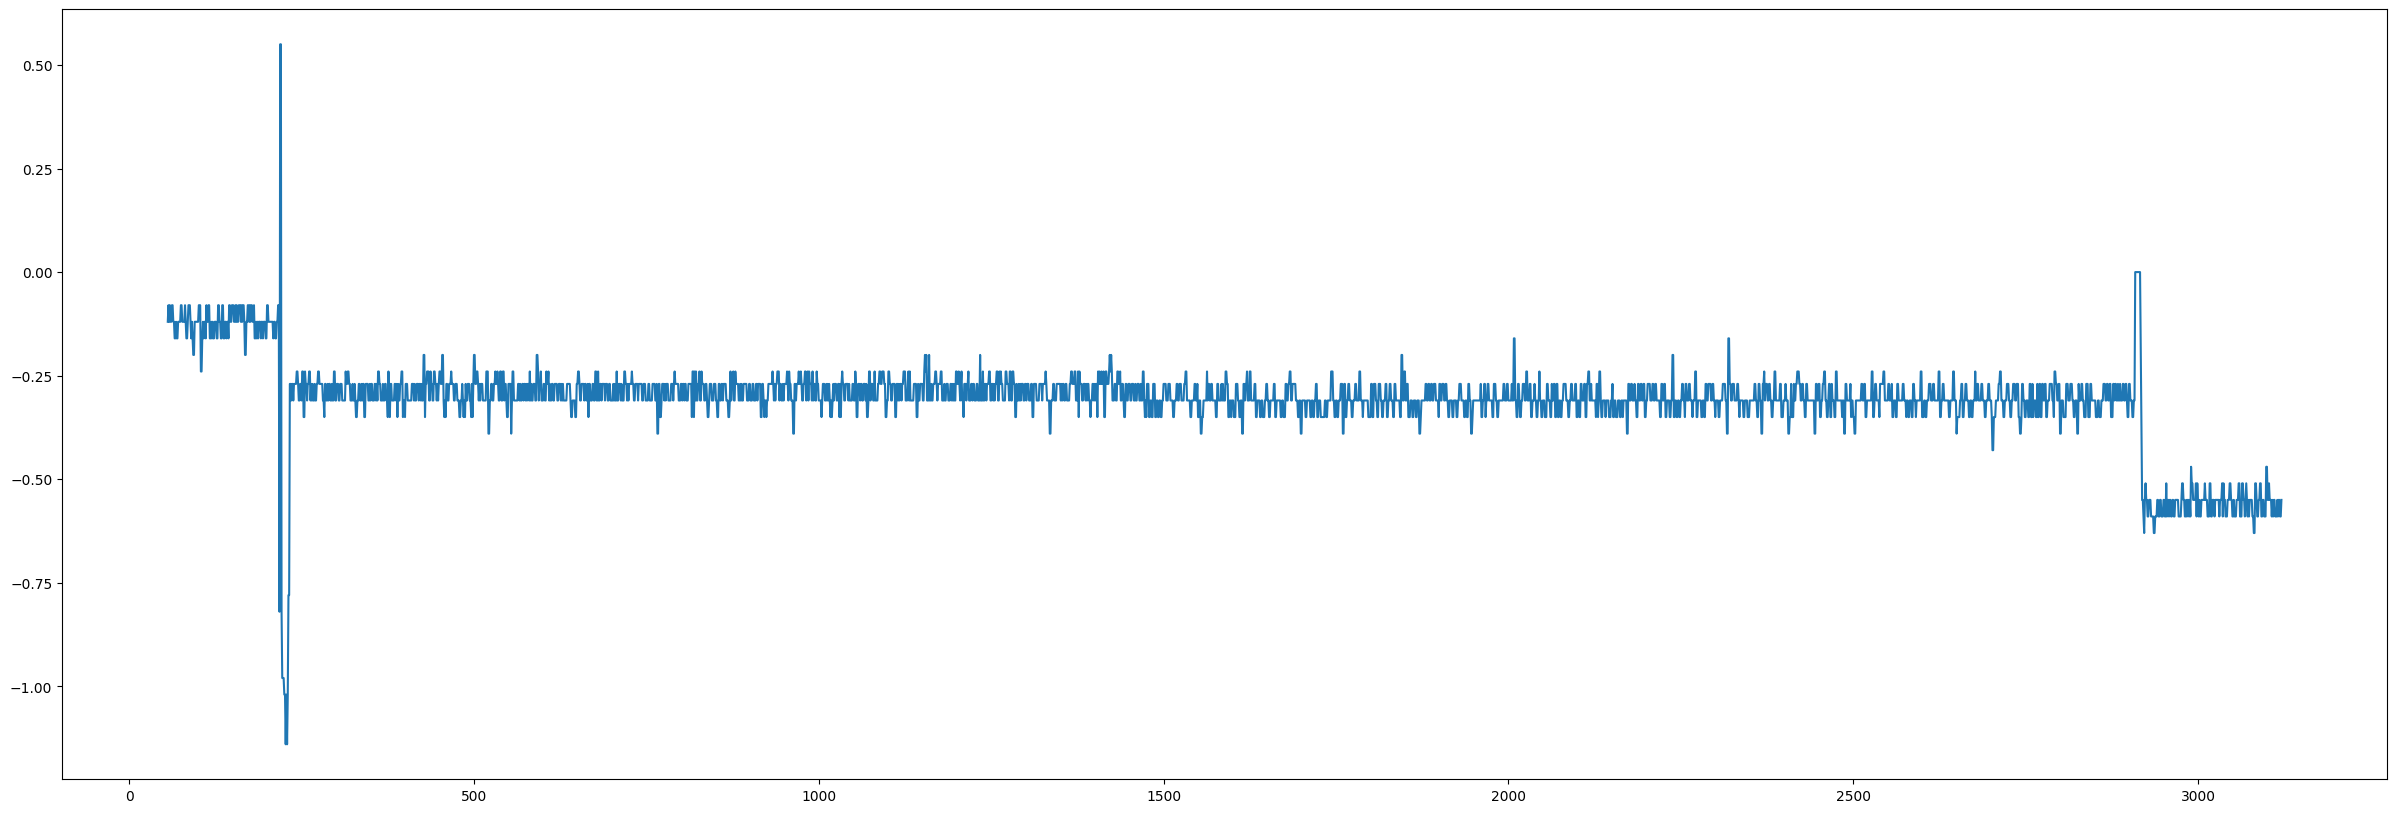

In [133]:
df['sensor_value'].plot(figsize=(30,10))

In [134]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
        dftest = adfuller(dataset, autolag = 'AIC')
        print("1. ADF : ",dftest[0])
        print("2. P-Value : ", dftest[1])
        print("3. Num of Lags : ", dftest[2])
        print("4. Num of observations Used For ADF Regression and Critical Values Claculation : ", dftest[3])
        print("5. Critical Values : ")
        for key, val in dftest[4].items():
            print("\t",key, ": ", val)

In [135]:
ad_test(df['sensor_value'])

1. ADF :  -3.837034384768166
2. P-Value :  0.0025503387071947716
3. Num of Lags :  23
4. Num of observations Used For ADF Regression and Critical Values Claculation :  3038
5. Critical Values : 
	 1% :  -3.4325043232232058
	 5% :  -2.8624918426656825
	 10% :  -2.5672766901321467


In [136]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [137]:
stepwise_fit = auto_arima(df['sensor_value'], trace = True,
                         suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-9705.720, Time=2.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9063.556, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9152.006, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9343.328, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9065.536, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-9707.025, Time=0.82 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-9680.617, Time=0.89 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9564.588, Time=1.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-9705.633, Time=2.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-9702.434, Time=0.61 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-9649.622, Time=1.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-9717.932, Time=2.58 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-9708.047, Time=2.75 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-9747.344, Time=3.23 sec
 ARIMA(1,1,4)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3062
Model:               SARIMAX(2, 1, 5)   Log Likelihood                4884.499
Date:                Tue, 25 Jul 2023   AIC                          -9750.999
Time:                        08:24:51   BIC                          -9696.760
Sample:                             0   HQIC                         -9731.509
                               - 3062                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0001      0.000     -0.618      0.537      -0.001       0.000
ar.L1         -0.3949      0.138     -2.866      0.004      -0.665      -0.125
ar.L2          0.5873      0.077      7.587      0.000       0.436       0.739
ma.L1          0.1188      0.138      0.862      0.388      -0.151       0.389
ma.L2         -1.1044      0.110    -10.023      0.000      -1.320      -0.888
ma.L3          0.1365      0.040      3.382      0.001       0.057       0.216
ma.L4          0.2085      0.049      4.278      0.000       0.113       0.304
ma.L5         -0.1627      0.023     -7.165      0.000      -0.207      -0.118
sigma2         0.0024   1.08e-05    223.163      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):           3118065.14
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                             1.27
Prob(H) (two-sided):                  0.00   Kurtosis:                       159.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [139]:
from statsmodels.tsa.arima.model import ARIMA

In [140]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(3062, 3)
(3032, 3) (30, 3)


In [141]:
#train the model
model=ARIMA(train['sensor_value'],order=(2,1,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           sensor_value   No. Observations:                 3032
Model:                 ARIMA(2, 1, 5)   Log Likelihood                4819.919
Date:                Tue, 25 Jul 2023   AIC                          -9623.837
Time:                        08:25:06   BIC                          -9575.704
Sample:                             0   HQIC                         -9606.533
                               - 3032                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0318      0.171      0.186      0.853      -0.304       0.368
ar.L2          0.4764      0.093      5.118      0.000       0.294       0.659
ma.L1         -0.3505      0.172     -2.041      0.041      -0.687      -0.014
ma.L2         -0.9060      0.145     -6.254      0.000      -1.190      -0.622
ma.L3          0.3719      0.051      7.361      0.000       0.273       0.471
ma.L4          0.1354      0.075      1.815      0.069      -0.011       0.282
ma.L5         -0.1117      0.032     -3.449      0.001      -0.175      -0.048
sigma2         0.0024   9.06e-06    261.944      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   2.34   Jarque-Bera (JB):           2511970.10
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                             1.10
Prob(H) (two-sided):                  0.00   Kurtosis:                       144.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [142]:
#make predictions on test set
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
print(pred)

3092   -0.535528
3093   -0.533888
3094   -0.533703
3095   -0.536153
3096   -0.538161
3097   -0.539392
3098   -0.540387
3099   -0.541006
3100   -0.541500
3101   -0.541810
3102   -0.542055
3103   -0.542211
3104   -0.542332
3105   -0.542410
3106   -0.542471
3107   -0.542510
3108   -0.542540
3109   -0.542560
3110   -0.542575
3111   -0.542584
3112   -0.542592
3113   -0.542597
3114   -0.542601
3115   -0.542603
3116   -0.542605
3117   -0.542606
3118   -0.542607
3119   -0.542608
3120   -0.542608
3121   -0.542608
Name: predicted_mean, dtype: float64


<Axes: >

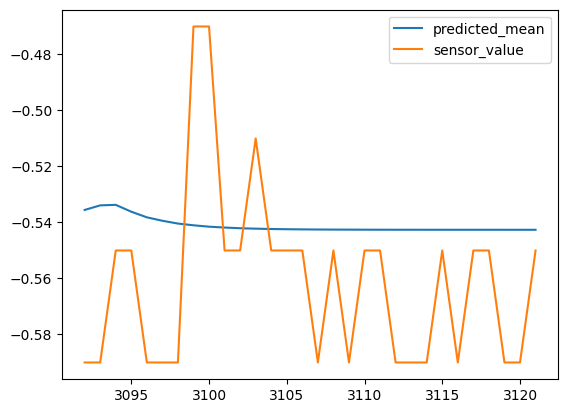

In [143]:
pred.plot(legend=True)
test['sensor_value'].plot(legend=True)

In [144]:
test['sensor_value'].mean()

-0.5606666666666666

In [145]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['sensor_value']))
print(rmse)

0.038361327560542086


In [146]:
model2=ARIMA(df['sensor_value'],order=(2,1,5))
model2=model2.fit()
df.tail()

,device_id,sensor_value,timestamp
3117,1,-0.55,2023-07-12 15:11:50
3118,1,-0.55,2023-07-12 15:11:51
3119,1,-0.59,2023-07-12 15:11:53
3120,1,-0.59,2023-07-12 15:11:53
3121,1,-0.55,2023-07-12 15:11:55


In [147]:
# for future dates
index_future_dates=pd.date_range(start='2023-07-12 15:11:55', end='2023-07-13 15:11:55')
print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
print(pred)
pred.index=index_future_dates
df.set_index('timestamp', inplace=True)
print(pred.index)

DatetimeIndex(['2023-07-12 15:11:55', '2023-07-13 15:11:55'], dtype='datetime64[ns]', freq='D')
3062   -0.553898
3063   -0.566884
3064   -0.560632
3065   -0.560653
3066   -0.560172
3067   -0.560260
3068   -0.559838
3069   -0.559974
3070   -0.559596
3071   -0.559767
3072   -0.559421
3073   -0.559616
3074   -0.559294
3075   -0.559507
3076   -0.559202
3077   -0.559427
3078   -0.559135
3079   -0.559370
3080   -0.559087
3081   -0.559327
3082   -0.559052
3083   -0.559296
3084   -0.559027
3085   -0.559274
3086   -0.559009
3087   -0.559257
3088   -0.558996
3089   -0.559245
3090   -0.558987
3091   -0.559236
3092   -0.558981
Name: ARIMA Predictions, dtype: float64


ValueError: Length mismatch: Expected axis has 31 elements, new values have 2 elements

<Axes: >

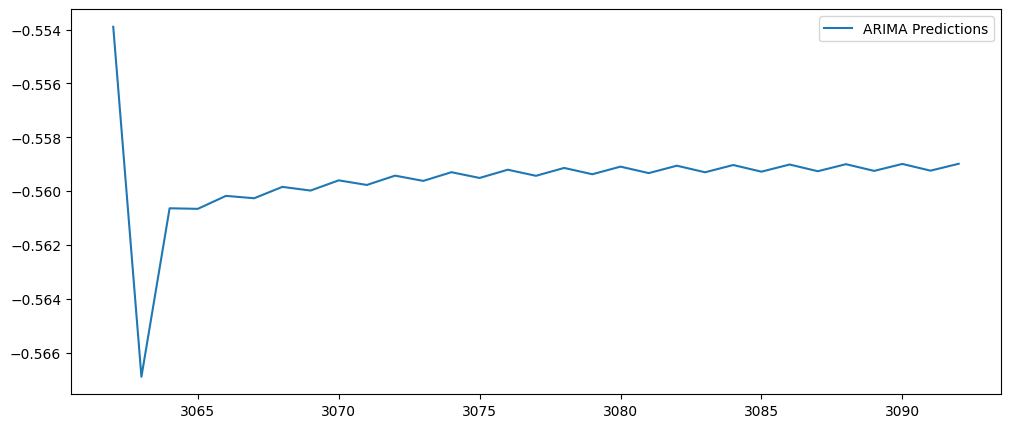

In [148]:
pred.plot(figsize=(12,5),legend=True)